In [4]:
%load_ext sql
%sql ibm_db_sa://mdg34815:s3z6pq5926@sp8ll@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: mdg34815@BLUDB'

In [7]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


ValueError: Table 'chicago_socioeconomic_data' already exists.

In [9]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [12]:
%sql select count(*) FROM chicago_socioeconomic_data

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


In [14]:
%sql SELECT count(*) from chicago_socioeconomic_data where hardship_index >50.0

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [29]:
%sql select  community_area_name  from chicago_socioeconomic_data order by hardship_index  desc 

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
CHICAGO
Riverdale
Fuller Park
South Lawndale
Englewood
Gage Park
West Garfield Park
New City
West Englewood
Washington Park


In [36]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000;

 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://mdg34815:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


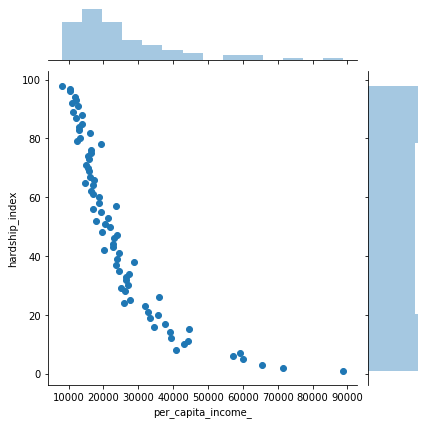

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())